In [88]:
!pip install astropy photutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
from astropy.nddata import CCDData, Cutout2D
from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture

import numpy as np
from matplotlib import pyplot as plt

In [90]:
#load FITS image data
image = CCDData.read('gal3.bz2')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


In [91]:
#image flux unit
image.unit

Unit("nmgy")

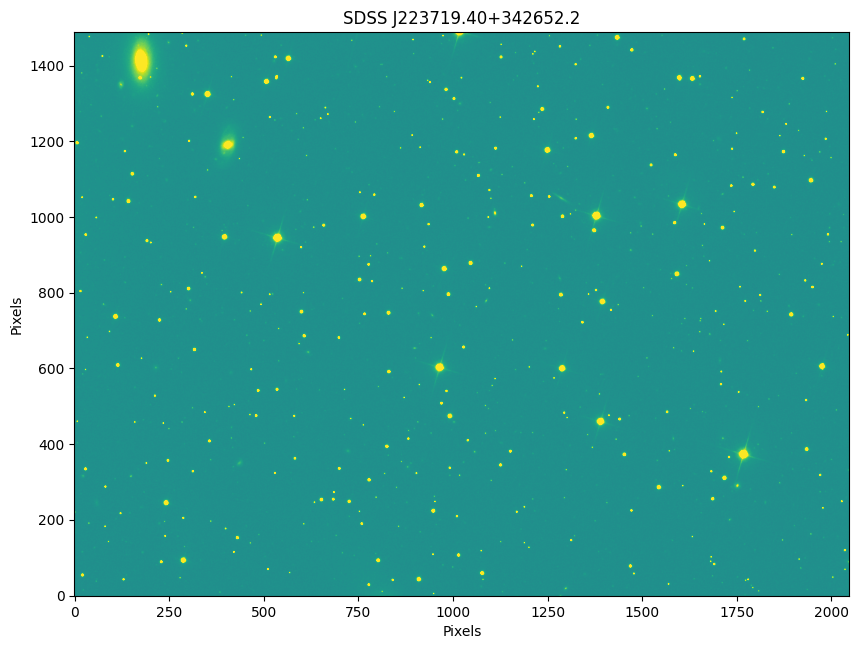

In [92]:
#plot the image
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'

vmax = image.data.std() # Use the image std as max and min range of all plots
vmin = - vmax

plt.imshow(image.data, vmin=vmin, vmax=vmax)
plt.title("SDSS J223719.40+342652.2")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.show()

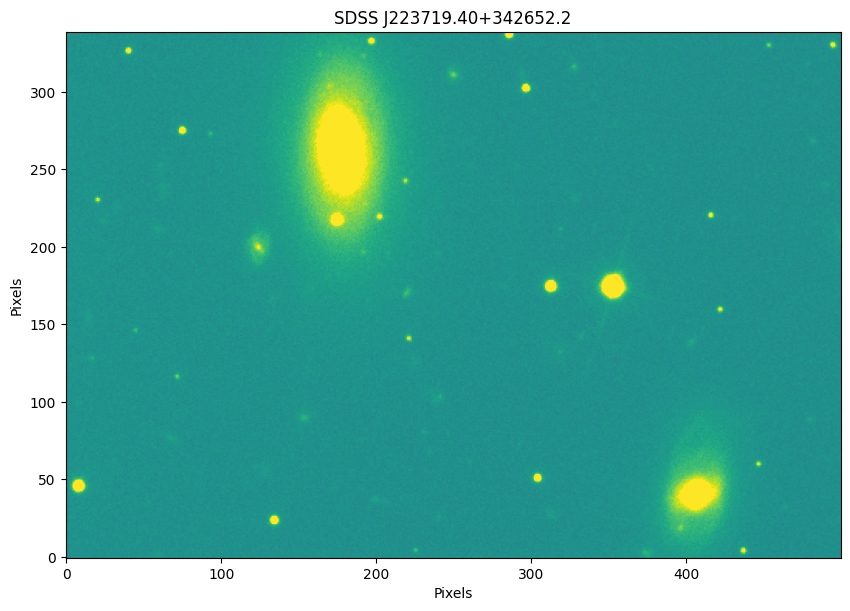

In [93]:
#plot zoom-in/cutout version of image
cutout_image = Cutout2D(image, position=(250,1400), size=500)

plt.imshow(cutout_image.data, vmin=vmin, vmax=vmax)
plt.title("SDSS J223719.40+342652.2")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.show()

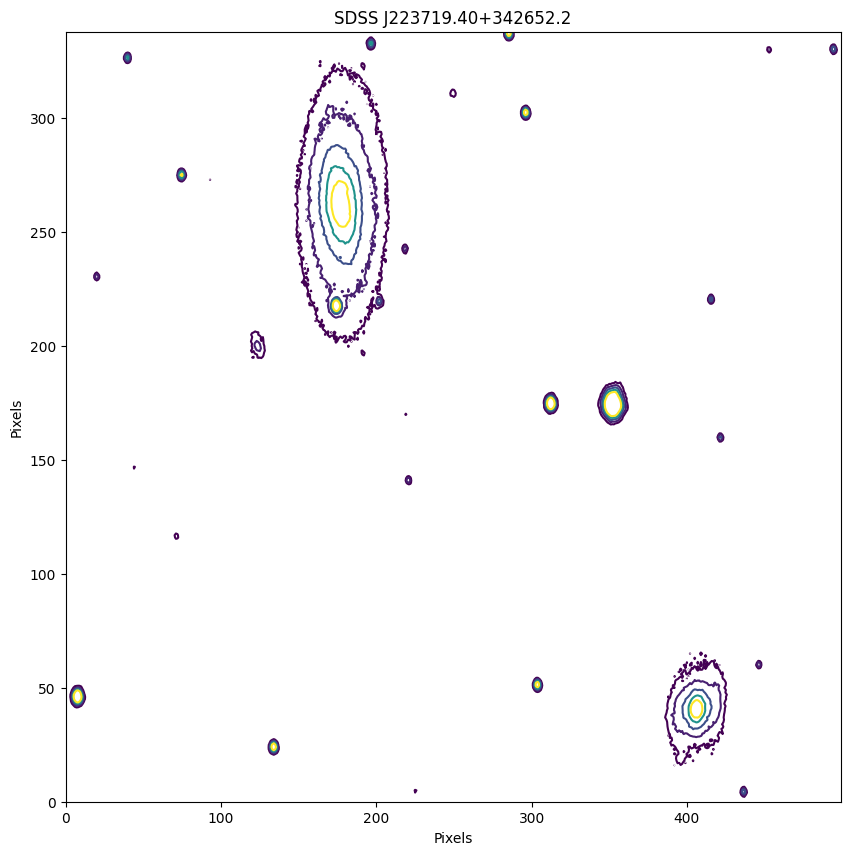

In [94]:
#plot image intensity contour
ax = plt.subplot()
ax.contour(cutout_image.data, levels=np.logspace(-0.5, 0.5, 5))#, colors='white', alpha=0.5)

plt.title("SDSS J223719.40+342652.2")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.show()

In [95]:
#approximate initial ellips
geometry = EllipseGeometry(x0=185, y0=1410, sma=60, eps=0.5,
                           pa=90.0 * np.pi / 180.0)

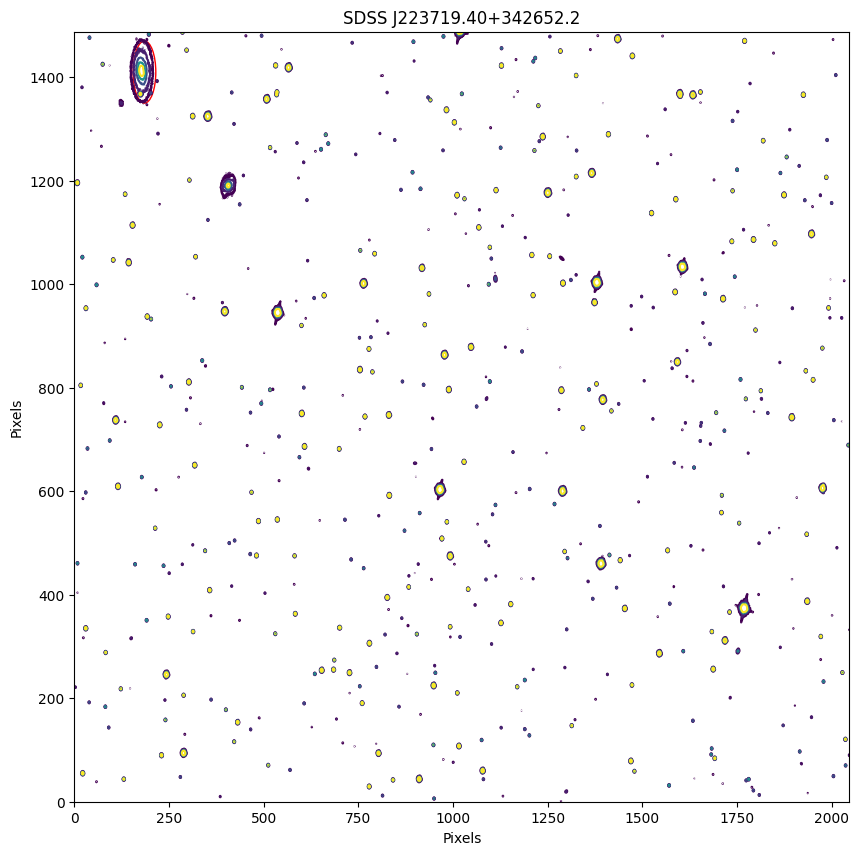

In [96]:
#show initial ellipse guess
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)

ax2 = plt.subplot()
ax2.contour(image.data, levels=np.logspace(-0.5, 0.5, 5))#, colors='white', alpha=0.5)
aper.plot(color='red')

plt.title("SDSS J223719.40+342652.2")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.show()

In [97]:
#re-load data in .fits format
from astropy.io import fits
image = fits.open("gal3.fits")
pixel_data = image[0].data

In [98]:
#input data to be fitted to ellipse class
from photutils.isophote import Ellipse
ellipse = Ellipse(pixel_data, geometry)

In [99]:
#perform elliptical isophote fit
isolist = ellipse.fit_image()

In [100]:
#results isophote list in table format
print(isolist.to_table()) 

       sma                intens        ... niter stop_code
                                        ...                
------------------ -------------------- ... ----- ---------
               0.0   23.214036417761527 ...     0         0
0.5111130767700377    22.23073453747162 ...    10         0
0.5622243844470415   22.083835014311283 ...    10         0
0.6184468228917457   21.924384213898747 ...    10         0
0.6802915051809203   21.746817142522602 ...    10         0
0.7483206556990124   21.442088499487642 ...    10         0
0.8231527212689137    20.98111378696772 ...    10         0
0.9054679933958051   20.474517710649177 ...    10         0
0.9960147927353856    19.92737879920153 ...    10         0
1.0956162720089242   19.375673725810255 ...    10         0
               ...                  ... ...   ...       ...
              60.0  0.30718914982033835 ...    20         0
              66.0  0.23019160603701122 ...    10         0
 72.60000000000001  0.15853122185424556 

Text(0, 0.5, 'y0')

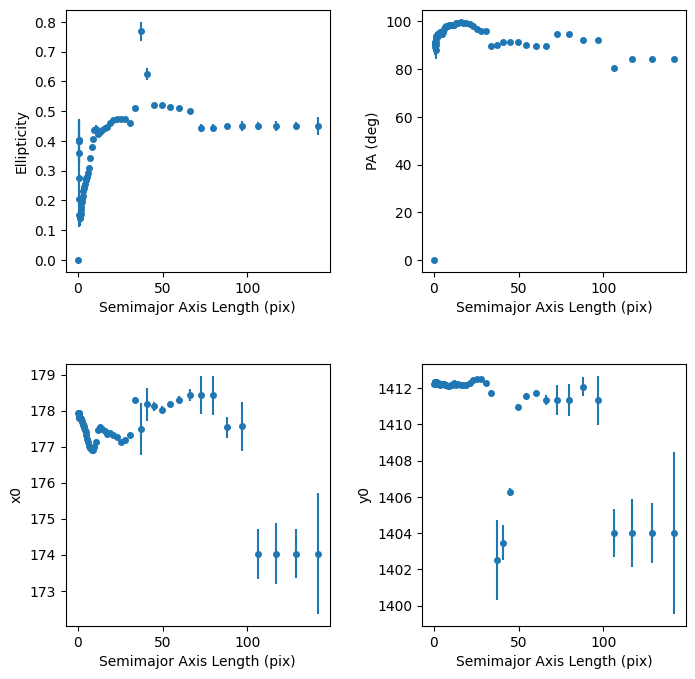

In [101]:
#plot the ellipticity, position angle, and the center x and y position as a function of the semimajor axis length
plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace=0.35, wspace=0.35)

plt.subplot(2, 2, 1)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err,
             fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('Ellipticity')

plt.subplot(2, 2, 2)
plt.errorbar(isolist.sma, isolist.pa / np.pi * 180.0,
             yerr=isolist.pa_err / np.pi * 80.0, fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('PA (deg)')

plt.subplot(2, 2, 3)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('x0')

plt.subplot(2, 2, 4)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('y0')

In [102]:
print(isolist.eps)

[0.         0.40007267 0.40079566 0.40221768 0.40171996 0.35938919
 0.27597006 0.20322374 0.15055511 0.14282587 0.14127027 0.14081258
 0.14367678 0.14917794 0.15511514 0.16632109 0.1772527  0.19537348
 0.20359427 0.21367871 0.23100883 0.24396992 0.24243513 0.25586629
 0.26763589 0.27695346 0.28039474 0.29329433 0.30809436 0.34285477
 0.38003759 0.40648062 0.43561701 0.44135338 0.42235695 0.42906002
 0.43675315 0.44321695 0.44785334 0.46181466 0.4692431  0.47434116
 0.47329415 0.47218673 0.46175445 0.51182761 0.76831522 0.62601725
 0.51944166 0.51944166 0.513369   0.51182761 0.4992762  0.44352991
 0.44352991 0.45062112 0.45062112 0.45062112 0.45062112 0.45062112
 0.45062112]


In [103]:
print(isolist.pa / np.pi * 180.0)

[ 0.         91.05132096 91.09762913 91.15309391 91.26902795 90.81802326
 90.47625608 89.42029711 88.03870607 90.15666254 91.51411505 92.85942967
 93.80076538 93.44790915 93.66522175 93.88505926 94.59600087 94.92226851
 94.41929335 94.89004953 95.04203097 94.99792853 95.35852596 95.13203913
 94.87721664 94.75006913 95.74663796 96.6948065  97.66998955 97.89924611
 97.89924611 98.42129808 98.42129808 98.42129808 98.60484912 99.2827307
 99.45852477 99.74251685 99.43228316 99.39768613 98.94371778 98.13670903
 96.74336733 96.19341536 95.79719858 89.83169971 90.11819045 91.16591806
 91.16591806 91.16591806 90.29902137 89.83169971 89.83169971 94.86650416
 94.86650416 92.38764947 92.38764947 80.27049982 84.27805973 84.27805973
 84.27805973]


In [104]:
print(isolist.x0)

[177.93052466 177.93052466 177.92319067 177.91505545 177.90579761
 177.8882519  177.8546696  177.8261367  177.80644014 177.80170732
 177.80137639 177.8009219  177.7980675  177.79095689 177.77986594
 177.7670474  177.7557815  177.72279442 177.67928324 177.63315357
 177.59501873 177.56595249 177.51675685 177.4716057  177.41453391
 177.32857982 177.21759348 177.12807301 177.01888253 176.96534619
 176.9195475  176.9195475  176.98623264 177.14185081 177.46830608
 177.53670846 177.49948446 177.44224731 177.35824145 177.36914018
 177.32554574 177.25569201 177.13934511 177.1867103  177.3225011
 178.29866942 177.49981425 178.17964847 178.12277202 178.02771342
 178.179941   178.29866942 178.43378104 178.43378104 178.43378104
 177.53437061 177.56627152 174.03015379 174.03015379 174.03015379
 174.03015379]


In [105]:
print(isolist.y0)

[1412.21564135 1412.21564135 1412.23706013 1412.26070209 1412.28696774
 1412.30762651 1412.31999557 1412.32524637 1412.32334705 1412.3202257
 1412.31247961 1412.30368175 1412.2934188  1412.27557251 1412.26509766
 1412.26422713 1412.25577516 1412.25249782 1412.23498018 1412.22006704
 1412.22783252 1412.21731136 1412.19198814 1412.20101932 1412.20291962
 1412.19883974 1412.20844709 1412.19780022 1412.18309532 1412.17566725
 1412.13366962 1412.13366962 1412.17420173 1412.17235952 1412.25383314
 1412.1821421  1412.20366309 1412.18588738 1412.18766424 1412.14738027
 1412.27856941 1412.42287029 1412.48767106 1412.52071389 1412.2749819
 1411.74458702 1402.51329972 1403.48110102 1406.27574913 1410.94649319
 1411.578171   1411.74458702 1411.34848359 1411.34848359 1411.34848359
 1412.07954891 1411.31447456 1404.0145864  1404.0145864  1404.0145864
 1404.0145864 ]


In [106]:
print(isolist.sma)

[  0.           0.51111308   0.56222438   0.61844682   0.68029151
   0.74832066   0.82315272   0.90546799   0.99601479   1.09561627
   1.2051779    1.32569569   1.45826526   1.60409178   1.76450096
   1.94095106   2.13504616   2.34855078   2.58340586   2.84174644
   3.12592109   3.4385132    3.78236452   4.16060097   4.57666107
   5.03432717   5.53775989   6.09153588   6.70068947   7.37075841
   8.10783426   8.91861768   9.81047945  10.79152739  11.87068013
  13.05774815  14.36352296  15.79987526  17.37986278  19.11784906
  21.02963397  23.13259737  25.4458571   27.99044281  30.78948709
  33.8684358   37.25527938  40.98080732  45.07888805  49.58677686
  54.54545455  60.          66.          72.6         79.86
  87.846       96.6306     106.29366    116.923026   128.6153286
 141.47686146]


In [107]:
#calculate semiminor axis length from fit results in pixels
sma = 60.0
e = 0.45062112
semi_minor_axis = sma * np.sqrt(1-e**2)
semi_minor_axis

53.56291797835331

In [108]:
#calculate inclination in degree
axis_ratio = semi_minor_axis / sma
inclination = np.arccos(axis_ratio) / np.pi * 180.0
inclination

26.783541349933277